In [27]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [28]:
all_df = pd.read_excel("data/titanic3.xls")

In [29]:
cols=['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

In [30]:
msk = numpy.random.rand( len(all_df) ) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [31]:
print('total:', len(all_df))
print('train:', len(train_df))
print('test:', len(test_df))

total: 1309
train: 1034
test: 275


In [32]:
# define the preprocess function  
def preprocess_data(raw_df):
    df = raw_df.drop( ['name'], axis=1 )
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map( {'female':0, 'male':1} ).astype(int)
    x_one_hot_df = pd.get_dummies( data=df, columns=["embarked" ])
    
    nd_array = x_one_hot_df.values
    feature = nd_array[:, 1:]
    label = nd_array[:, 0]
    
    minmax_scale = preprocessing.MinMaxScaler( feature_range=(0,1) )
    scaled_features = minmax_scale.fit_transform( feature )
    
    return scaled_features,label

In [33]:
train_features, train_label = preprocess_data( train_df )
test_features, test_label = preprocess_data( test_df )

In [34]:
train_features[:5]

array([[0.        , 0.        , 0.38844819, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00679502, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.02151711, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.40203823, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.33408803, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [35]:
train_label[:5]

array([1., 1., 0., 0., 0.])

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [37]:
model = Sequential()

model.add( Dense(units=40, input_dim=9, kernel_initializer='uniform', activation='relu') )

model.add( Dense(units=30, kernel_initializer='uniform', activation='relu') )

model.add( Dense(units=1, kernel_initializer='uniform', activation='sigmoid') )

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [39]:
train_history = model.fit( x=train_features, y=train_label, validation_split=0.1, epochs=30, batch_size=30, verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 0s - loss: 0.6901 - acc: 0.5774 - val_loss: 0.6713 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6681 - acc: 0.5957 - val_loss: 0.5915 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6101 - acc: 0.6677 - val_loss: 0.4942 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5454 - acc: 0.7634 - val_loss: 0.4624 - val_acc: 0.7788
Epoch 5/30
 - 0s - loss: 0.5062 - acc: 0.7624 - val_loss: 0.4552 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4911 - acc: 0.7645 - val_loss: 0.4399 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4823 - acc: 0.7591 - val_loss: 0.4424 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4789 - acc: 0.7581 - val_loss: 0.4344 - val_acc: 0.7885
Epoch 9/30
 - 0s - loss: 0.4734 - acc: 0.7645 - val_loss: 0.4274 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.4697 - acc: 0.7753 - val_loss: 0.4252 - val_acc: 0.8077
Epoch 11/30
 - 0s - loss: 0.4657 - acc: 0.7602 - val_loss: 0.4219 - val_acc: 0.8173
Epoch 12/30
 - 0s - loss: 0.4639 - acc:

In [40]:
import matplotlib.pyplot as pyplot
def my_show_train_history(input_train_history, input_train, input_validation):
    pyplot.plot(input_train_history.history[input_train] )
    pyplot.plot(input_train_history.history[input_validation])
    pyplot.title('Train History')
    pyplot.ylabel(input_train)
    # pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epoch')
    pyplot.legend(['my_train','my_validation'], loc='upper left')
    pyplot.show()

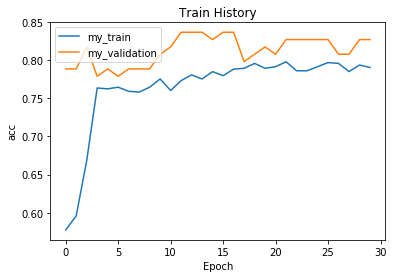

In [41]:
my_show_train_history( train_history, 'acc', 'val_acc' )

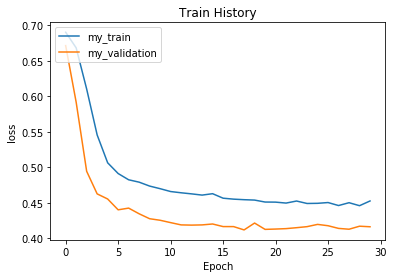

In [42]:
my_show_train_history( train_history, 'loss', 'val_loss' )

In [43]:
scores = model.evaluate( x=test_features, y=test_label)

275/275 [==============================] - 0s 54us/step


In [44]:
scores[1]

0.8109090913425793

In [ ]:
# insert 'probability' into dataframe

In [47]:
all_features, all_label = preprocess_data( all_df )

In [48]:
all_probability = model.predict( all_features )

In [49]:
all_probability[:5]

array([[0.97696316],
       [0.609896  ],
       [0.9721666 ],
       [0.40561366],
       [0.97113806]], dtype=float32)

In [53]:
pd = all_df

In [ ]:
pd.insert( len(all_df.columns), 'probability', all_probability)

In [55]:
pd[-10:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
1299,0,"Yasbeck, Mr. Antoni",3,male,27.0,1,0,14.4542,C,0.224009
1300,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",3,female,15.0,1,0,14.4542,C,0.765482
1301,0,"Youseff, Mr. Gerious",3,male,45.5,0,0,7.2250,C,0.158982
1302,0,"Yousif, Mr. Wazli",3,male,NaN,0,0,7.2250,C,0.227004
1303,0,"Yousseff, Mr. Gerious",3,male,NaN,0,0,14.4583,C,0.226095
1304,0,"Zabour, Miss. Hileni",3,female,14.5,1,0,14.4542,C,0.767593
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,14.4542,C,0.696737
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5,0,0,7.2250,C,0.244171
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.2250,C,0.241578
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.8750,S,0.144389


In [56]:
pd[ (pd['survived']==0) & (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.972167
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.971138
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.977837
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.975898
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.962791


In [57]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.976963
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.609896
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.972167
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.405614
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.971138
